In [69]:
import re
import pandas as pd
import kagglehub
from sklearn.model_selection import train_test_split

In [70]:
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [61]:
fake_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real_df = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [62]:
real_df.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [63]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Checking out the distribution of real and fake news, we want to avoid class imbalances. From the figure, it is looking fine.

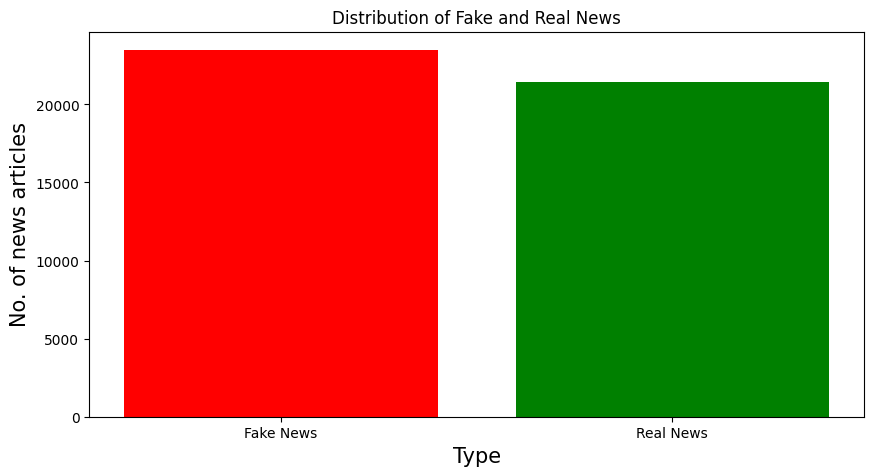

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake and Real News')
plt.xlabel('Type', size=15)
plt.ylabel('No. of news articles', size=15)
plt.show()

In [64]:
# defining fake news as 0 and real news as 1
fake_df["class"] = 0
real_df["class"] = 1

In [66]:
def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
# Combine title and text, then clean
fake_df['text_input'] = fake_df['title'].fillna('') + " [SEP] " + fake_df['text'].fillna('')
real_df['text_input'] = real_df['title'].fillna('') + " [SEP] " + real_df['text'].fillna('')

fake_df['text_input'] = fake_df['text_input'].apply(clean_text)
real_df['text_input'] = real_df['text_input'].apply(clean_text)


# Select relevant column, as date and subject col will not play a huge part in the classification
fake_df = fake_df[['text_input', 'class']]
real_df = real_df[['text_input', 'class']]

# Concatenate the two dataframes
combined_df = pd.concat([fake_df, real_df], ignore_index=True)


# Split data
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

# Save train and test data
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)


In [68]:
sample_text = train_df["text_input"].iloc[1]
print(sample_text)


BREAKING: Trump Reportedly Considering Ted Cruz For Top Cabinet Position [SEP] Ted Cruz would be fair, honest and most of all, he would follow the law. He would hands down be one of the best choices for this position President-elect Donald Trump is considering nominating Texas Senator Ted Cruz to serve as U.S. attorney general, according to a person familiar with the matter.Cruz, 45, was at Trump Tower in New York on Tuesday. When approached by reporters on his way out, Cruz said the election was a mandate for change but didn t say he was under consideration for a job.Cruz unsuccessfully sought the Republican presidential nomination. He and Trump were at odds during the primary, viciously attacking one another. Trump nicknamed Cruz Lyin Ted. Cruz didn t endorse Trump during a speech at the Republican National Convention in Cleveland. In September, relations between the two men seemed to improve when Cruz said he would vote for Trump.Asked for comment, Cruz spokeswoman Catherine Frazier